In [66]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# importing the dataset
df=pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')

In [3]:
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
# chekcing the shape of the dataframe
df.shape

(91741, 15)

In [5]:
# counting the number of null values in each column
df.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [6]:
# dropping the county and state columns since it has no use in our analysis
df.drop(columns=['county_name','state'],inplace=True)

In [7]:
# since we are analyzing the police behaviour on gender a row with missing value on gender would be not useful so removing it
df.dropna(subset=['driver_gender'],inplace=True)

In [8]:
# checking again the shape of the df. We have removed 2 columns and 5205 rows

df.shape

(86536, 13)

In [9]:
# checking the dtype of the is_arrested column
df.is_arrested.dtype

dtype('O')

In [10]:
# it needs to be converted into the bool type so  chaning the dtype of the is_arrested column to the bool type
df['is_arrested']=df['is_arrested'].astype('bool')

In [11]:
# concatenating the stop_date and stop_time column 
combined=df['stop_date'].str.cat(df['stop_time'],sep=' ')
df['stop_datetime']=combined

# converting it into datetime dtype
df['stop_datetime']=pd.to_datetime(df['stop_datetime'])

In [12]:
# checking the dtypes of the columns
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [13]:
# making it as the index
df.set_index('stop_datetime',inplace=True)

In [14]:
# checking unique values in the viloation column
df.violation.unique()

# counting the number of violation
df.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [15]:
# creating a dataframe for females
female=df[df['driver_gender']=='F']

# creating a dataframe for male
male=df[df['driver_gender']=='M']

In [16]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [17]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [18]:
# females stopped for sppeding
females_and_speeding=df[(df['driver_gender']=='F') & (df['violation']=='Speeding')]

# checking what is the outcome for the females stopped for speeding
(females_and_speeding.stop_outcome.value_counts(normalize=True)*100).round(decimals=2)

Citation            95.22
Warning              4.01
Arrest Driver        0.58
N/D                  0.10
Arrest Passenger     0.06
No Action            0.04
Name: stop_outcome, dtype: float64

In [19]:
# males stopped for speeding
males_and_speeding=df[(df['driver_gender']=='M') & (df['violation']=='Speeding')]

# checking what is the outcome for the males stopped for speeding
(males_and_speeding.stop_outcome.value_counts(normalize=True)*100).round(decimals=2)

Citation            94.46
Warning              3.62
Arrest Driver        1.59
Arrest Passenger     0.13
No Action            0.11
N/D                  0.10
Name: stop_outcome, dtype: float64

 The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

#### Checking Does the driver's gender affect whether their vehicle is searched?

In [20]:
# Calculate the search rate by counting the values
print((df.search_conducted.value_counts(normalize=True)*100).round(decimals=2))


False    96.18
True      3.82
Name: search_conducted, dtype: float64


In [21]:
# calculating the search rate for both and females
df.groupby('driver_gender')['search_conducted'].mean()*10

driver_gender
F    0.191806
M    0.454256
Name: search_conducted, dtype: float64

In [22]:
# Calculate the search rate for each combination of gender and violation
df.groupby(['driver_gender','violation']).search_conducted.mean()*10

driver_gender  violation          
F              Equipment              0.399840
               Moving violation       0.392575
               Other                  0.410184
               Registration/plates    0.549242
               Seat belt              0.173010
               Speeding               0.083088
M              Equipment              0.714964
               Moving violation       0.615242
               Other                  0.461912
               Registration/plates    1.088024
               Seat belt              0.351185
               Speeding               0.278854
Name: search_conducted, dtype: float64

In [23]:
# checking the different search types
df['search_type'].value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [24]:
# checking search types that include the Protective frisk
df['frisk']=df['search_type'].str.contains('Protective Frisk',na=False)

In [25]:
# checking how many search types include the protective frisk
df['frisk'].sum()

303

In [26]:
# filtering the rows in which search is conducted
searched=df[df['search_conducted']==True]

# calculating the frisk rate
print('Frisk rate:',searched.frisk.mean(),end='\n\n')

# calculating the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

Frisk rate: 0.09162382824312065

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


The frisk rate is higher for males than for females, 

In [27]:
# calculating the arrest rate
arrest_rate=df['is_arrested'].mean()
print('Arrest Rate',arrest_rate)

Arrest Rate 0.0355690117407784


In [28]:
# calculating the arrest rate for each hour of the day
hourly_arrest_rate=df.groupby(df.index.hour)['is_arrested'].mean()
print(hourly_arrest_rate)

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


Text(0.5, 1.0, 'Arrest rate vs Hours')

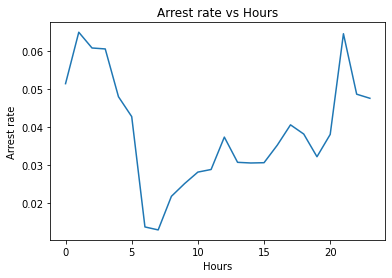

In [29]:
hourly_arrest_rate.plot()
plt.xlabel('Hours')
plt.ylabel('Arrest rate')
plt.title('Arrest rate vs Hours')

 The arrest rate has a significant spike overnight, and then dips in the early morning hours.

<AxesSubplot:xlabel='stop_datetime'>

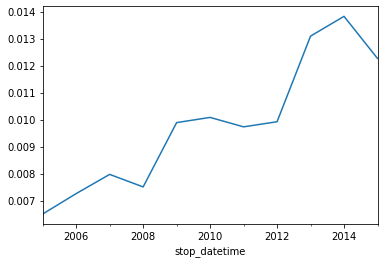

In [30]:
# analyzing drup related stops
annual_drug_rate=df.drugs_related_stop.resample('A').mean()

# plotting visually
annual_drug_rate.plot()

The rate of drug-related stops nearly doubled over the course of 10 years.

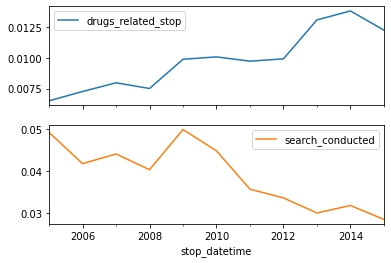

In [31]:
# Calculating and saving the annual search rate (grouping the index by year by resample method)
annual_search_rate = df.search_conducted.resample('A').mean()

# Concatenating 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Creating subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [43]:
# creating a frequency table of violations and district
cross=pd.crosstab(df.district,df.violation)
cross

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [46]:
# filerting ZoneK1 to ZoneK2
zones=cross.loc['Zone K1':'Zone K3',:]
zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


<Figure size 1440x720 with 0 Axes>

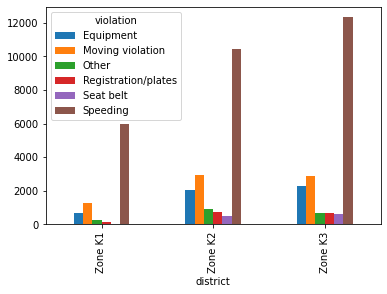

In [67]:
plt.gcf().set_size_inches(20, 10)
zones.plot(kind='bar')
plt.show()

In [72]:
# analyzing the stop duration for each violation
df.stop_duration.unique()

# mapping the stop duration
mapper={'0-15 Min':8,'16-30 Min':23,'30+ Min':45}
df['stop_minutes']=df.stop_duration.map(mapper)

# checking the unique values of stop_minutes column
df['stop_minutes'].unique()

array([ 8, 23, 45], dtype=int64)

#### Importing and Validating the weather dataset

In [75]:
# importing the weather dataset in rhode island
weather=pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')

In [77]:
# checking the columns of the weather dataframe
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [78]:
# analyzing the temperature column
weather[['TAVG', 'TMIN', 'TMAX']].describe()

,TAVG,TMIN,TMAX
count,1217.000000,4017.000000,4017.000000
mean,52.493016,43.484441,61.268608
std,17.830714,17.020298,18.199517
min,6.000000,-5.000000,15.000000
25%,39.000000,30.000000,47.000000
50%,54.000000,44.000000,62.000000
75%,68.000000,58.000000,77.000000
max,86.000000,77.000000,102.000000


<AxesSubplot:>

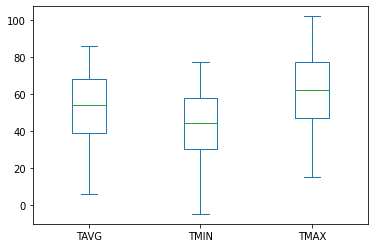

In [79]:
# creating a box plot of temperature columns to validate the data
weather[['TAVG', 'TMIN', 'TMAX']].plot(kind='box')

The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

In [81]:
# creating a column which denotes the difference between the max and min difference
weather['TDIFF']=weather['TMAX']-weather['TMIN']

<AxesSubplot:>

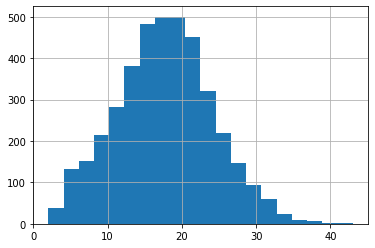

In [82]:
# checking the distribution og the TDIFF columns
weather['TDIFF'].hist(bins=20)

it follows the gaussian distribution and it has no negative values

#### Preparing the weather dataset
The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

- WT05 indicates "Hail"
- WT11 indicates "High or damaging winds"
- WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

#### Determing how bad the weather was for each day

<AxesSubplot:>

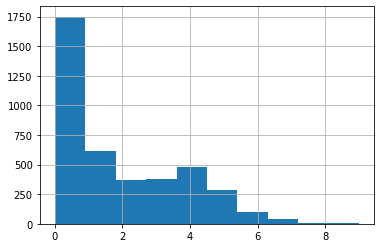

In [85]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.hist()

 It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

In [86]:
# converting the bad_conditions column into categorical column as a new column called rating
mapping ={0:'good', 1:'bad', 2:'bad',3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}
weather['rating']=weather['bad_conditions'].map(mapping)

In [88]:
# converting the rating column from categorical to ordinal category
cats=pd.CategoricalDtype(['good','bad','worse'],ordered=True)
weather['rating']=weather['rating'].astype(cats)

#### Merging the weather and df dataframes to perform our analysis on the behaviour of police based on the weather

In [91]:
# restting the index of df
df.reset_index(inplace=True)

# extracting the date and ratings column from weather dataframe 
weather_rating=weather.loc[:,['DATE','rating']]

In [93]:
# merging our df and weather_rating dataframes and storing it in a new dataframe called data
data=pd.merge(left=df,right=weather_rating,left_on='stop_date',right_on='DATE',how='left')

#### analyzing the relationship between the police behaviour and weather

In [95]:
# calculating the arrest rate for each weather type
data.groupby('rating')['is_arrested'].mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [104]:
# calculating the arrest rate for each weather type and violation
arrest_rate=data.groupby(['rating','violation'])['is_arrested'].mean()
arrest_rate

rating  violation          
good    Equipment              0.059007
        Moving violation       0.056227
        Other                  0.076966
        Registration/plates    0.081574
        Seat belt              0.028587
        Speeding               0.013405
bad     Equipment              0.066311
        Moving violation       0.058050
        Other                  0.087443
        Registration/plates    0.098160
        Seat belt              0.022493
        Speeding               0.013314
worse   Equipment              0.097357
        Moving violation       0.065860
        Other                  0.062893
        Registration/plates    0.115625
        Seat belt              0.000000
        Speeding               0.016886
Name: is_arrested, dtype: float64

In [105]:
# converting the multi index series into a dataframe
arrest_rate.unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.059007,0.056227,0.076966,0.081574,0.028587,0.013405
bad,0.066311,0.058050,0.087443,0.098160,0.022493,0.013314
worse,0.097357,0.065860,0.062893,0.115625,0.000000,0.016886
